<h1 align='center'>FAKE NEWS DETECTION</h1>

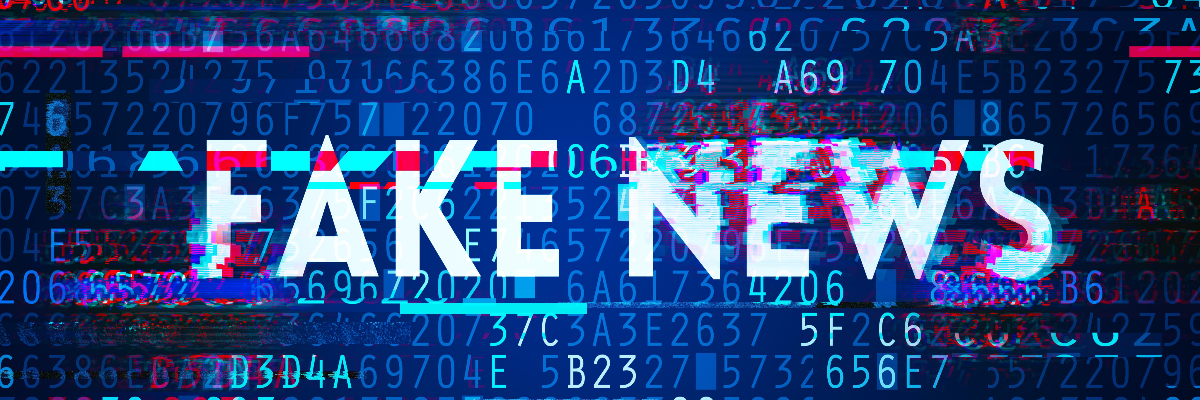

## In this project, I am going to detect whether the news is fake or real.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## **Important Libraries**
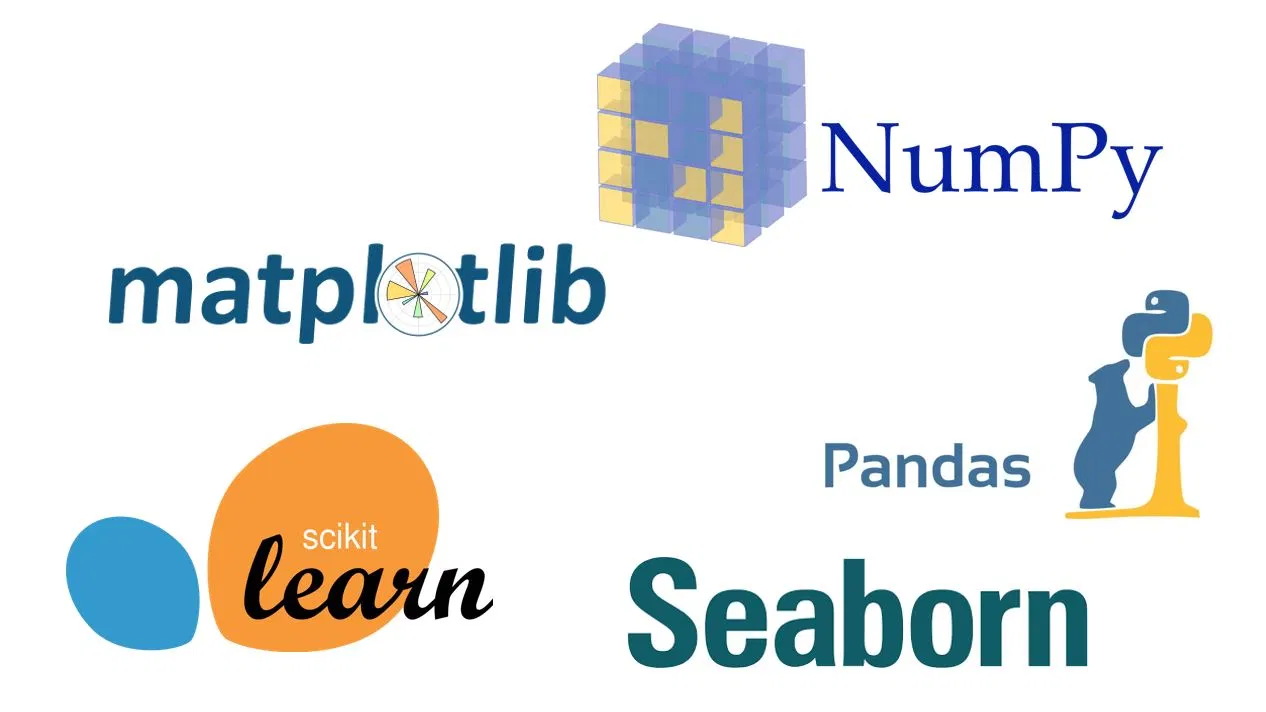

For data manipulation and creating arrays:

    Pandas Library
    Numpy Library

For converting words into vectors:

    sklearn.feature_extraction.text import CountVectorizer
    sklearn.feature_extraction.text import TfidfVectorizer

For model building:

    sklearn.ensemble import RandomForestClassifier
    sklearn.naive_bayes import MultinomialNB
    sklearn.naive_bayes import GaussianNB
    sklearn.ensemble import AdaBoostClassifier


For model evaluation:

    sklearn.metrics import classification_report,confusion_matrix,accuracy_score


**About Dataset**

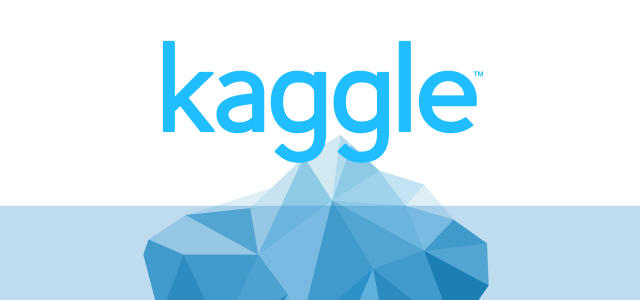

1. The dataset was taken from the kaggle platform
2. There are two datasets involved in this problem.<br>
   -> Fake.csv file - This dataset contains a list of articles considered as "fake" news<br>
   -> True.csv file - This dataset contains a list of articles considered as "True" news
3. Label '1' denotes - The news is fake.
4. Label '0' denotes - The news is real.


In [ ]:
#Reading a data using python's pandas library
import pandas as pd

In [ ]:
true_data=pd.read_csv('/gdrive/My Drive/Fake News/True.csv')

In [ ]:
#printing the true_data
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#Adding label column to the true dataset.
label=[]
for i in true_data.index:
  label.append(0)

true_data["Label"]=label


In [ ]:
#printing the data after adding the label column
true_data.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
#Reading the fake_news data using pandas
fake_data=pd.read_csv('/gdrive/My Drive/Fake News/Fake.csv')

In [ ]:
#printing the fake data
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#Adding the label column to the fake dataset
label_1=[]
for i in fake_data.index:
  label_1.append(1)

  
fake_data["Label"]=label_1

In [ ]:
fake_data.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


## Combining two datasets into single dataset

In [ ]:
fake_data.columns = true_data.columns

In [ ]:
data = pd.concat([true_data,fake_data], ignore_index=True)
print(data)

                                                   title  ... Label
0      As U.S. budget fight looms, Republicans flip t...  ...     0
1      U.S. military to accept transgender recruits o...  ...     0
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...     0
3      FBI Russia probe helped by Australian diplomat...  ...     0
4      Trump wants Postal Service to charge 'much mor...  ...     0
...                                                  ...  ...   ...
44893  McPain: John McCain Furious That Iran Treated ...  ...     1
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...     1
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...     1
44896  How to Blow $700 Million: Al Jazeera America F...  ...     1
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...     1

[44898 rows x 5 columns]


In [ ]:
print(data.shape)

(44898, 5)


<BarContainer object of 2 artists>

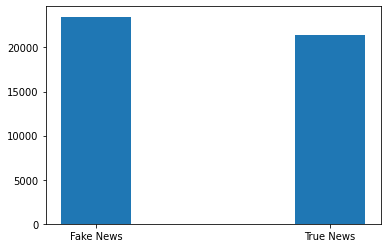

In [ ]:
#Visualizing the data for better understanding
import matplotlib.pyplot as plt
val_counts=data['Label'].value_counts()
plt.bar(['Fake News','True News'],val_counts,data=data['Label'],width=0.3)


From the above graph, it is clear that fake news records are higher than real news records. 

In [ ]:
#Visualizing the news subjects for better understanding
subj_counts=data['subject'].value_counts()
print(subj_counts)

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


<BarContainer object of 8 artists>

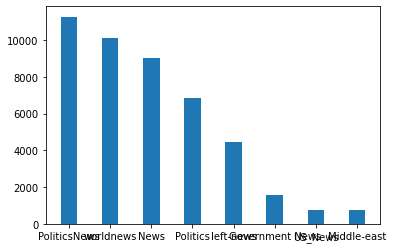

In [ ]:
plt.bar(['PoliticsNews','worldnews','News','Politics','left-news','Government News','US_News','Middle-east'],subj_counts,data=data['subject'],width=0.4)

From the above graph, we got an insight that political and world news plays an major role in this dataset.

In [ ]:
#removing unnecessary columns
data.drop(['title','subject','date'],axis=1,inplace=True)

In [ ]:
data.head(10)

,text,Label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",0
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",0
7,The following statements were posted to the ve...,0
8,The following statements were posted to the ve...,0
9,WASHINGTON (Reuters) - Alabama Secretary of St...,0


In [ ]:
#changing the column names for convinience
data.columns=['News','Result']

 ## Text Pre-processing

 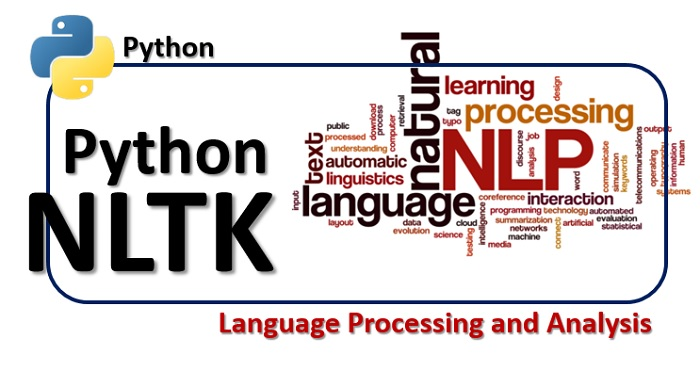

In [ ]:
#Text pre-processing
sentences=[]
for i in range(0,len(data['News'])):
  sentences.append(data['News'][i])

In [ ]:
sentences[0:9]

['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [ ]:
#importing necessary libraries for text pre-processing
import re
import nltk
nltk.download('punkt')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemmatizer=WordNetLemmatizer()
for i in range(0,len(sentences)):
  news=re.sub('[^a-zA-Z]',' ',sentences[i]) #removing punctuation marks using regex
  news=news.lower() #lowering the sentences
  news=news.split() #word tokenization
  news= [lemmatizer.lemmatize(word) for word in news if word not in set(stopwords.words('english'))] #lemmatization and removing stopwords
  sentences[i]=' '.join(news) 

In [ ]:
#printing the processed data in the form of dataframe
processed_news=pd.DataFrame(sentences)
processed_news.columns=['News']
processed_news.head()





,News
0,washington reuters head conservative republica...
1,washington reuters transgender people allowed ...
2,washington reuters special counsel investigati...
3,washington reuters trump campaign adviser geor...
4,seattle washington reuters president donald tr...


In [ ]:
#saving the pre processed data for future reference
complete_processed_data=pd.concat([processed_news,data['Result']],axis=1)
complete_processed_data.head(10)

,News,Result
0,washington reuters head conservative republica...,0
1,washington reuters transgender people allowed ...,0
2,washington reuters special counsel investigati...,0
3,washington reuters trump campaign adviser geor...,0
4,seattle washington reuters president donald tr...,0
5,west palm beach fla washington reuters white h...,0
6,west palm beach fla reuters president donald t...,0
7,following statement posted verified twitter ac...,0
8,following statement posted verified twitter ac...,0
9,washington reuters alabama secretary state joh...,0


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#saving the dataframe to csv file
complete_processed_data.to_csv('/gdrive/My Drive/Fake News/Complete_processed_news_data.csv')